## Reuters - Classification of News feeds

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [4]:
from keras.models import Sequential
from keras.layers import Dense

In [5]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [20]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 13s 69ms/step - loss: 3.0704 - accuracy: 0.4027 - val_loss: 1.7020 - val_accuracy: 0.6590
Epoch 2/20
16/16 [==============================] - 1s 39ms/step - loss: 1.4679 - accuracy: 0.7002 - val_loss: 1.3059 - val_accuracy: 0.7040
Epoch 3/20
16/16 [==============================] - 1s 39ms/step - loss: 1.0915 - accuracy: 0.7543 - val_loss: 1.1255 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 39ms/step - loss: 0.8386 - accuracy: 0.8225 - val_loss: 1.0569 - val_accuracy: 0.7560
Epoch 5/20
16/16 [==============================] - 1s 40ms/step - loss: 0.6643 - accuracy: 0.8610 - val_loss: 0.9664 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 1s 38ms/step - loss: 0.5357 - accuracy: 0.8904 - val_loss: 0.9521 - val_accuracy: 0.7850
Epoch 7/20
16/16 [==============================] - 1s 39ms/step - loss: 0.4323 - accuracy: 0.9078 - val_loss: 0.9006 - val_accuracy: 0.8020
Epoch 8/20
1

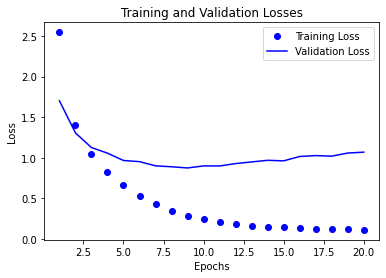

In [25]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

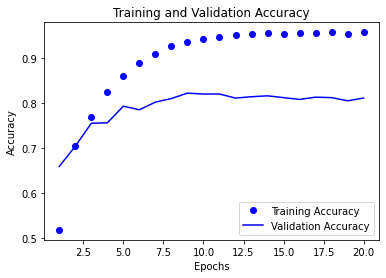

In [26]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [36]:
# New model, which will be learned till 9-th epoch, as we have overfitting

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=9, batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 2s 58ms/step - loss: 3.0408 - accuracy: 0.3772 - val_loss: 1.6642 - val_accuracy: 0.6430
Epoch 2/9
16/16 [==============================] - 1s 40ms/step - loss: 1.4731 - accuracy: 0.6888 - val_loss: 1.2917 - val_accuracy: 0.7160
Epoch 3/9
16/16 [==============================] - 1s 40ms/step - loss: 1.0562 - accuracy: 0.7688 - val_loss: 1.1189 - val_accuracy: 0.7690
Epoch 4/9
16/16 [==============================] - 1s 43ms/step - loss: 0.8070 - accuracy: 0.8312 - val_loss: 1.0299 - val_accuracy: 0.7850
Epoch 5/9
16/16 [==============================] - 1s 42ms/step - loss: 0.6603 - accuracy: 0.8597 - val_loss: 0.9669 - val_accuracy: 0.7920
Epoch 6/9
16/16 [==============================] - 1s 39ms/step - loss: 0.5267 - accuracy: 0.8811 - val_loss: 0.9521 - val_accuracy: 0.7890
Epoch 7/9
16/16 [==============================] - 1s 41ms/step - loss: 0.3981 - accuracy: 0.9213 - val_loss: 0.8981 - val_accuracy: 0.8080
Epoch 8/9
16/16 [===

In [37]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 0.9880 - accuracy: 0.7845


In [38]:
results

[0.9880197048187256, 0.7845057845115662]

In [39]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [40]:
np.sum(predictions[0])

1.0

In [41]:
np.argmax(predictions[0])

3

In [42]:
# 1 Experiment

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=9, batch_size=512, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 53ms/step - loss: 3.6567 - accuracy: 0.2517 - val_loss: 3.1972 - val_accuracy: 0.3590
Epoch 2/9
16/16 [==============================] - 1s 38ms/step - loss: 3.0016 - accuracy: 0.3637 - val_loss: 2.6890 - val_accuracy: 0.3870
Epoch 3/9
16/16 [==============================] - 1s 37ms/step - loss: 2.4725 - accuracy: 0.4209 - val_loss: 2.3346 - val_accuracy: 0.4370
Epoch 4/9
16/16 [==============================] - 1s 39ms/step - loss: 2.1071 - accuracy: 0.4785 - val_loss: 2.0965 - val_accuracy: 0.4720
Epoch 5/9
16/16 [==============================] - 1s 39ms/step - loss: 1.8301 - accuracy: 0.5176 - val_loss: 1.9179 - val_accuracy: 0.4900
Epoch 6/9
16/16 [==============================] - 1s 38ms/step - loss: 1.5901 - accuracy: 0.5384 - val_loss: 1.7096 - val_accuracy: 0.5390
Epoch 7/9
16/16 [==============================] - 1s 37ms/step - loss: 1.3926 - accuracy: 0.6142 - val_loss: 1.5734 - val_accuracy: 0.6570
Epoch 8/9
16/16 [===

In [43]:
# 2 Experiment

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=9, batch_size=512, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 74ms/step - loss: 2.8513 - accuracy: 0.4620 - val_loss: 1.4291 - val_accuracy: 0.6770
Epoch 2/9
16/16 [==============================] - 1s 59ms/step - loss: 1.1938 - accuracy: 0.7421 - val_loss: 1.1352 - val_accuracy: 0.7480
Epoch 3/9
16/16 [==============================] - 1s 60ms/step - loss: 0.8150 - accuracy: 0.8277 - val_loss: 1.0516 - val_accuracy: 0.7650
Epoch 4/9
16/16 [==============================] - 1s 59ms/step - loss: 0.6045 - accuracy: 0.8713 - val_loss: 0.9478 - val_accuracy: 0.8060
Epoch 5/9
16/16 [==============================] - 1s 60ms/step - loss: 0.4549 - accuracy: 0.9017 - val_loss: 0.8686 - val_accuracy: 0.8200
Epoch 6/9
16/16 [==============================] - 1s 58ms/step - loss: 0.3481 - accuracy: 0.9287 - val_loss: 0.8804 - val_accuracy: 0.8120
Epoch 7/9
16/16 [==============================] - 1s 58ms/step - loss: 0.2711 - accuracy: 0.9411 - val_loss: 0.8570 - val_accuracy: 0.8230
Epoch 8/9
16/16 [===

In [44]:
# 3 Experiment

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(10000,)))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=9, batch_size=512, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 114ms/step - loss: 2.5701 - accuracy: 0.4923 - val_loss: 1.2558 - val_accuracy: 0.7450
Epoch 2/9
16/16 [==============================] - 2s 101ms/step - loss: 0.9794 - accuracy: 0.8022 - val_loss: 0.9868 - val_accuracy: 0.8040
Epoch 3/9
16/16 [==============================] - 2s 99ms/step - loss: 0.5972 - accuracy: 0.8867 - val_loss: 0.8816 - val_accuracy: 0.8150
Epoch 4/9
16/16 [==============================] - 2s 101ms/step - loss: 0.4216 - accuracy: 0.9143 - val_loss: 0.8222 - val_accuracy: 0.8230
Epoch 5/9
16/16 [==============================] - 2s 99ms/step - loss: 0.2950 - accuracy: 0.9381 - val_loss: 0.8183 - val_accuracy: 0.8280
Epoch 6/9
16/16 [==============================] - 2s 101ms/step - loss: 0.2346 - accuracy: 0.9486 - val_loss: 0.7975 - val_accuracy: 0.8370
Epoch 7/9
16/16 [==============================] - 2s 101ms/step - loss: 0.1785 - accuracy: 0.9573 - val_loss: 0.8453 - val_accuracy: 0.8240
Epoch 8/9
16/16